In [1]:
import pandas as pd
from pickup_utilities import *

data = pd.read_csv('../data/complete.csv')
events = pd.read_csv('/home/burned/Events-2012.csv')


In [2]:
data['datetime'] = pd.to_datetime( data['datetime'] )
data['tstamp'] = data['datetime'].apply( lambda x : f'{x.hour}:{x.minute:02}')

events['Date'] = pd.to_datetime( events['Date'] )
events['Time'] = pd.to_datetime( events['Time'] )
events['Start-Time'] = pd.to_datetime( events['Start-Time'] )
events['End-Time'] = pd.to_datetime( events['End-Time'] )
events['Break-Time'] = events['Start-Time'] + (events['End-Time'] - events['Start-Time'])/2


In [7]:
event = events.iloc[6]

In [8]:
year, month, day = event['Date'].year, event['Date'].month, event['Date'].day

dfevent = data.loc[data['year']==year].loc[data['month']==month].loc[data['day']==day]

#dfevent = dfevent.set_index('tstamp')

title = (f'{event["Event Name"]} ({event["Sport"]})'
         f' {event["Date"].day}/{event["Date"].month}/{event["Date"].year} at '
         f'{event["Time"].hour}:{event["Time"].minute:02}')
tsb = f'{event["Start-Time"].hour}:{event["Start-Time"].minute:02}'
tse = f'{event["End-Time"].hour}:{event["End-Time"].minute:02}'


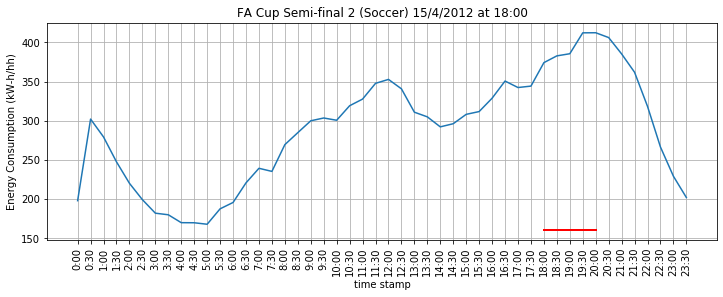

In [10]:
eventPlotter(dfevent, title,
             tsb, tse)

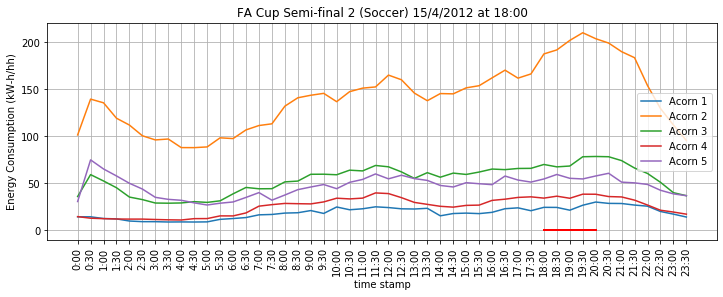

In [11]:
eventPlotterAcorn(dfevent, title,
             tsb, tse)

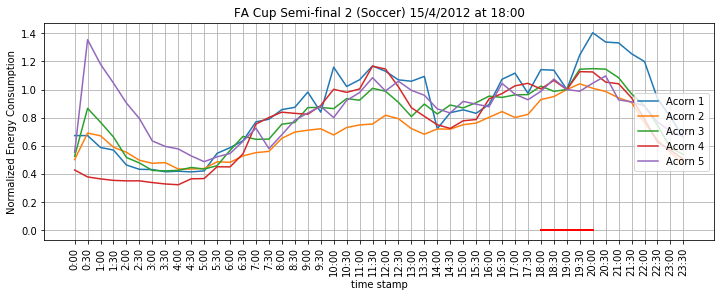

In [12]:

if event['Break-Time'].minute == 15:
    breaktime = f'{event["Break-Time"].hour}:00'
elif event['Break-Time'].minute == 45:
    breaktime = f'{event["Break-Time"].hour}:30'
else:
    breaktime = f'{event["Break-Time"].hour}:{event["Break-Time"].minute:02}'

eventPlotterAcorn(dfevent, title,
             tsb, tse, breaktime=breaktime)